In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(lme4)
quiet_library(ggpubr)
quiet_library(ggrepel)
quiet_library(ggthemes)
quiet_library(scater)
quiet_library(patchwork)
options(warn = -1)

In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")
coolors_clrs<-c("#EFB0A1","#009FF5","#1A5E9B","#42E2B8","#4ECDC4","#89B6A5","#F1D26A","#D5B0AC","#EDABB1","#02504D","#AA9674","#E64B35FF","#4DBBD5FF","#00A087FF")

cluster_colors_ext <- colorRampPalette(cluster_colors)(36)
options(repr.plot.width =5, repr.plot.height =5)

In [4]:
## reading pseudobulk Aim1 object
a1_psb=readRDS("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/certpro/input_files/Zi_pseudobulk obj/cache/5e5886cc-454c-4e3c-b858-4bbb3701dfb8/ALTRA_scRNA_AIFI_L3_Pseudobulk_certPro_AIM1_norm_counts_SE_list.rds")

In [5]:
a1_psb_filt <- a1_psb[names(a1_psb) %in% c('Core memory B cell','CM CD4 T cell','Core naive CD4 T cell','Core CD16 monocyte')]
a1_psb_filt

$`CM CD4 T cell`
class: SummarizedExperiment 
dim: 5948 76 
metadata(0):
assays(2): counts normalized_counts
rownames(5948): A1BG AAED1 ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi

$`Core CD16 monocyte`
class: SummarizedExperiment 
dim: 7996 75 
metadata(0):
assays(2): counts normalized_counts
rownames(7996): A1BG AAAS ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi

$`Core memory B cell`
class: SummarizedExperiment 
dim: 6506 76 
metadata(0):
assays(2): counts normalized_counts
rownames(6506): A1BG AAED1 ... ZYG11B ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi

$`Core naive CD4 T cell`
class: SummarizedExperiment 
dim: 5446 76 
metadata(0):
assays(2): counts normalized_counts
rownames(5446): A1BG AAK1 ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi


In [6]:
sce_list <- lapply(a1_psb_filt, function(se) {
  # Convert SummarizedExperiment to SingleCellExperiment
  sce <- SingleCellExperiment(
    assays = assays(se),        # Copy assays
    colData = colData(se),      # Copy colData
    rowData = rowData(se),      # Copy rowData (if any)
    metadata = metadata(se)     # Copy metadata (if any)
  )
  
  # Return the SingleCellExperiment object
  return(sce)
})

In [7]:
sce_list

$`CM CD4 T cell`
class: SingleCellExperiment 
dim: 5948 76 
metadata(0):
assays(2): counts normalized_counts
rownames(5948): A1BG AAED1 ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

$`Core CD16 monocyte`
class: SingleCellExperiment 
dim: 7996 75 
metadata(0):
assays(2): counts normalized_counts
rownames(7996): A1BG AAAS ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

$`Core memory B cell`
class: SingleCellExperiment 
dim: 6506 76 
metadata(0):
assays(2): counts normalized_counts
rownames(6506): A1BG AAED1 ... ZYG11B ZZEF1
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

$`Core naive CD4 T cell`
class: SingleCellExperiment 
dim: 5446 76 
metadata(0):
assays(2): counts n

In [8]:
process_sce <- function(sce) {
  # Access colData from the SingleCellExperiment object
  col_data <- colData(sce)
  
  # Create or update batch_corr column based on batch_id
  col_data$batch_corr <- ifelse(col_data$batch_id == "B182", 
                                "B182", 
                                "Other Batches")
  
  # Assign updated colData back to the SingleCellExperiment object
  colData(sce) <- col_data
  
  return(sce)
}

# Apply the function to each SingleCellExperiment object in the list
sce_list <- lapply(sce_list, process_sce)


In [9]:
# Create an empty list to store results
reducedDim_results <- vector("list", length = length(sce_list))

# Loop through each SCE object
for (i in seq_along(sce_list)) {
  # Perform PCA
  px <- prcomp(t(assay(sce_list[[i]], 'normalized_counts')))
  
  # Get the predicted cell type for the current SCE object
  cell_type <- colData(sce_list[[i]])$AIFI_L3[1]  # Adjust to match your actual column name
  
  # Assign PCA results to the corresponding reducedDims slot
  reducedDims(sce_list[[i]])$PCA <- px$x[, 1:20]
  
  # Save the results in the list
  reducedDim_results[[i]] <- sce_list[[i]]
}


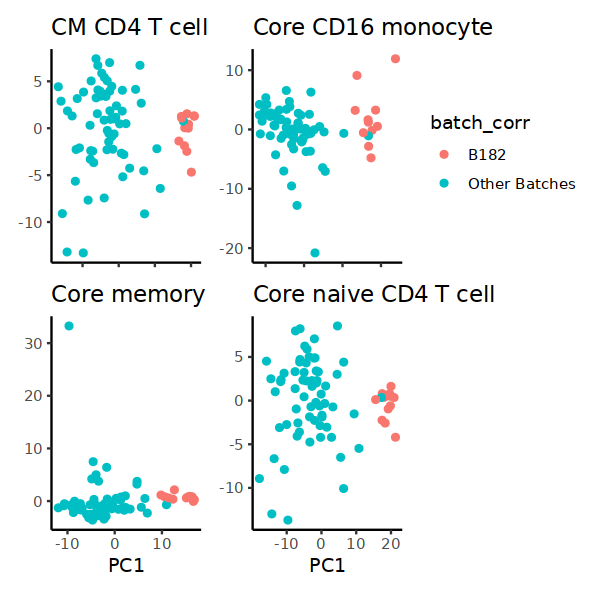

In [10]:
# Helper function to extract PCA results and metadata
extract_pca_data <- function(sce, dimred = "PCA", colour_by = "batch_corr") {
  pca_data <- as.data.frame(reducedDim(sce, dimred))  # Extract PCA
  pca_data$batch_corr <- colData(sce)[[colour_by]]    # Extract batch_corr
  pca_data$AIFI_L3 <- colData(sce)$AIFI_L3            # Extract AIFI_L3 (titles)
  return(pca_data)
}

# Extract PCA data for each reducedDim result
pca_df1 <- extract_pca_data(reducedDim_results[[1]])
pca_df2 <- extract_pca_data(reducedDim_results[[2]])
pca_df3 <- extract_pca_data(reducedDim_results[[3]])
pca_df4 <- extract_pca_data(reducedDim_results[[4]])

# Create individual PCA plots
p1 <- ggplot(pca_df1, aes(x = PC1, y = PC2, colour = batch_corr)) +
  geom_point() +
  ggtitle(unique(pca_df1$AIFI_L3)) +
  theme_classic() +
  theme(axis.title.x = element_blank(), axis.text.x = element_blank(), 
        axis.title.y = element_blank(), legend.position = "none")

p2 <- ggplot(pca_df2, aes(x = PC1, y = PC2, colour = batch_corr)) +
  geom_point() +
  ggtitle(unique(pca_df2$AIFI_L3)) +
  theme_classic() +
  theme(axis.title.x = element_blank(), axis.text.x = element_blank(), 
        axis.title.y = element_blank())

p3 <- ggplot(pca_df3, aes(x = PC1, y = PC2, colour = batch_corr)) +
  geom_point() +
  ggtitle(unique(pca_df3$AIFI_L3)) +
  theme_classic() +
  theme(axis.title.y = element_blank(), legend.position = "none", 
        plot.margin = margin(5.5, 5.5, 10, 5.5))

p4 <- ggplot(pca_df4, aes(x = PC1, y = PC2, colour = batch_corr)) +
  geom_point() +
  ggtitle(unique(pca_df4$AIFI_L3)) +
  theme_classic() +
  theme(axis.title.y = element_blank(), legend.position = "none", 
        plot.margin = margin(5.5, 5.5, 10, 5.5))

# Combine plots using patchwork
combined_plot <- (p1 | p2) / (p3 | p4)

# Display the combined plot
print(combined_plot)

In [11]:
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_S10_D.pdf", plot = combined_plot, width = 6, height = 5, units = "in")

In [12]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.2.0             scater_1.28.0              
 [3] scuttle_1.10.3              ggthemes_5.1.0             
 [5] ggrepel_0.9.5               lme4_1.1-34                
 [7] plotly_4.10.4               knitr_1.47                 
 [9] ggpubr_0.6.0                Seurat